# DALL-E 3 - Image generation from text

In [5]:
# Added so that I can refer to common in the parent folder
from pathlib import Path
import sys
path = str(Path(Path('.').parent.absolute()).parent.absolute())
sys.path.insert(0, path)

# Import the common module
import common
import os
from PIL import Image
import requests
from io import BytesIO

# Get a configured model
client = common.get_openai_client(api_key=common.api_KEY,
        api_version=common.api_version,
        azure_endpoint=common.api_URI)

In [6]:
def get_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = img.resize((img.width//2, img.height//2))
    img.show()

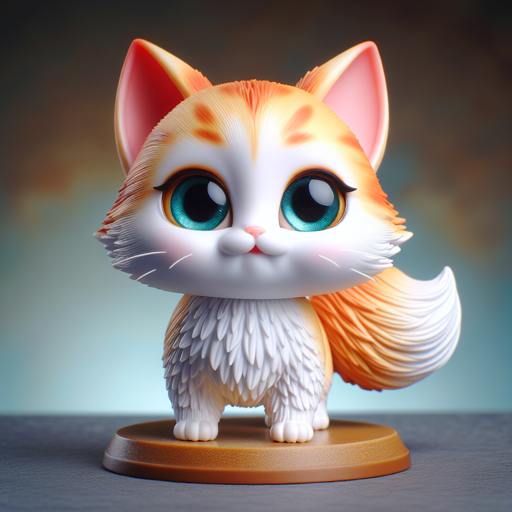

In [8]:
response = client.images.generate(
  model=common.dalle_deployment,
  prompt="a Funko toy of a cute cat",
  size="1024x1024",
  quality="standard",
  n=1,
)

image_url = response.data[0].url
get_image(image_url)